In [1]:
import json
import numpy as np
import gurobipy
import preference_models_utils
from gurobipy import Model, GRB, quicksum
import pandas as pd
import networkx as nx
import plotly.express as px

from preference_models_utils import create_planning, create_tables, dominate, ModelData, ModelDataSommePonderee, get_preorder, create_graph, get_non_dominated, run_model_uta, PrometheeI

In [2]:
m, data = utils.create_model('instances/toy_instance.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-12


In [3]:
filtered_solutions, scenario = get_non_dominated(m, data)

Starting optimzation...
done.


In [4]:
df_solutions = pd.DataFrame(-1*np.array(filtered_solutions))
df_solutions['scenario'] = scenario
df_solutions.rename(columns={0: 'f1', 1: 'f2', 2:'f3'}, inplace=True)

### UTA

In [5]:
ranking = [
    21,
    20,
    7
]
choices = df_solutions[['f1', 'f2', 'f3']].copy().to_numpy()

In [6]:
model_uta, data_uta = run_model_uta(choices, ranking)
df_solutions_uta = df_solutions.copy()
df_solutions_uta['scores'] = data_uta.scores

In [7]:
df_solutions_uta.sort_values(by='scores', ascending=False)

,f1,f2,f3,scenario,scores
17,42,-3,-3,51,1.340882
16,32,-2,-3,50,1.332941
18,50,-4,-3,52,1.325882
15,20,-1,-3,49,1.302059
21,57,-5,-4,69,1.294412
19,56,-5,-3,53,1.287941
20,65,-6,-3,54,1.284412
12,50,-5,-2,37,1.224118
11,40,-4,-2,36,1.216176
10,30,-3,-2,35,1.208235


### Weighted sum

,f1,f2,f3,scenario,degree
0,0,0,0,0,2
1,10,-2,-1,18,-8
2,20,-3,-1,19,3
3,30,-5,-1,21,1
4,37,-6,-1,22,9
5,47,-8,-1,24,6
6,49,-9,-1,25,-3
7,59,-11,-1,27,-5
8,10,-1,-2,33,-8
9,20,-2,-2,34,3


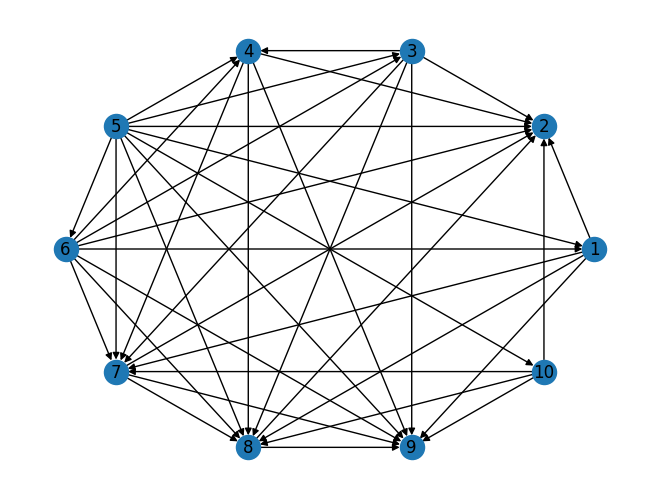

In [8]:
preference_list = [
    (6,   1),
    (6,   3),
    (6,   9),
    (7,   8)
]

#choices = filtered_solutions.copy()
choices = df_solutions[:10][['f1', 'f2', 'f3']].copy().to_numpy()
preordre_model, preordre_data = get_preorder(choices, preference_list)

G = create_graph(preordre_data, True)
#df_solutions['degree'] =  [G.out_degree(node) - G.in_degree(node) for node in G.nodes] 
df_solutions_wsum = df_solutions[:10].copy()
df_solutions_wsum['degree'] = [G.out_degree(node) - G.in_degree(node) for node in G.nodes]  
df_solutions_wsum

In [9]:
m.params.ScenarioNumber = df_solutions_wsum.sort_values(by='degree', ascending=False).iloc[0]['scenario']
tab_a, tab_b = create_tables(data)
display(tab_a)
display(tab_b)
create_planning(data)

,A,B,C
membre,,,
Olivia,1,1,1
Liam,1,1,0
Emma,0,0,1


,A,B,C
projet,,,
Job1,1,1,1
Job2,1,2,0
Job3,1,0,2
Job4,0,2,1
Job5,0,0,2


,0,1,2,3,4
membre,,,,,
Olivia,X,X,A_Job1,B_Job4,X
Liam,X,X,B_Job1,B_Job4,X
Emma,X,X,C_Job1,C_Job4,X


#### Outranking: PROMETHEE I

In [10]:
W = [x.X for x in preordre_data.Poids.values()]
S = [20, 1, 2]
config_params = {
    "dim": 3,
    "W": W,
    "S": S,
    "choices": choices
}

promethee = PrometheeI(**config_params)

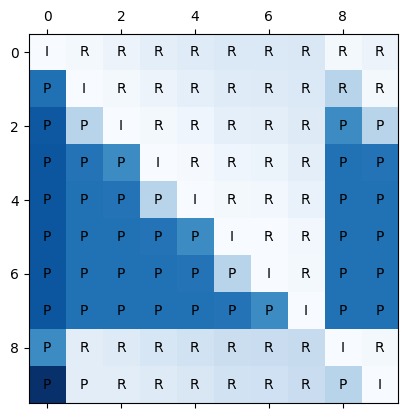

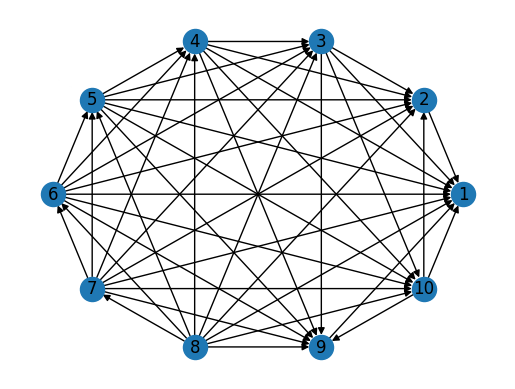

In [11]:
promethee.get_preorder()
promethee.plot_preferences()
promethee.plot_graph()